In [188]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
%matplotlib inline

NBA_DF = pd.DataFrame(pd.read_csv
                            ('/Users/MattPettit/Downloads/national-basketball-associationnba-dataset/NBA_train.csv'))
NBA = NBA_DF.drop(columns=(['SeasonEnd', 'Team', 'Playoffs', 'FG', 'FGA', '2P', '2PA', '3PA', 'FT', 'FTA', 'ORB', 
                            'AST', 'STL', 'BLK']))

In [181]:
NBA.corr()

,W,PTS,oppPTS,3P,DRB,TOV
W,1.000000,0.298826,-0.331573,0.119045,0.470897,-0.243186
PTS,0.298826,1.000000,0.789075,-0.489949,0.090291,0.427138
oppPTS,-0.331573,0.789075,1.000000,-0.562829,-0.212627,0.582413
3P,0.119045,-0.489949,-0.562829,1.000000,0.233354,-0.680173
DRB,0.470897,0.090291,-0.212627,0.233354,1.000000,-0.190957
TOV,-0.243186,0.427138,0.582413,-0.680173,-0.190957,1.000000


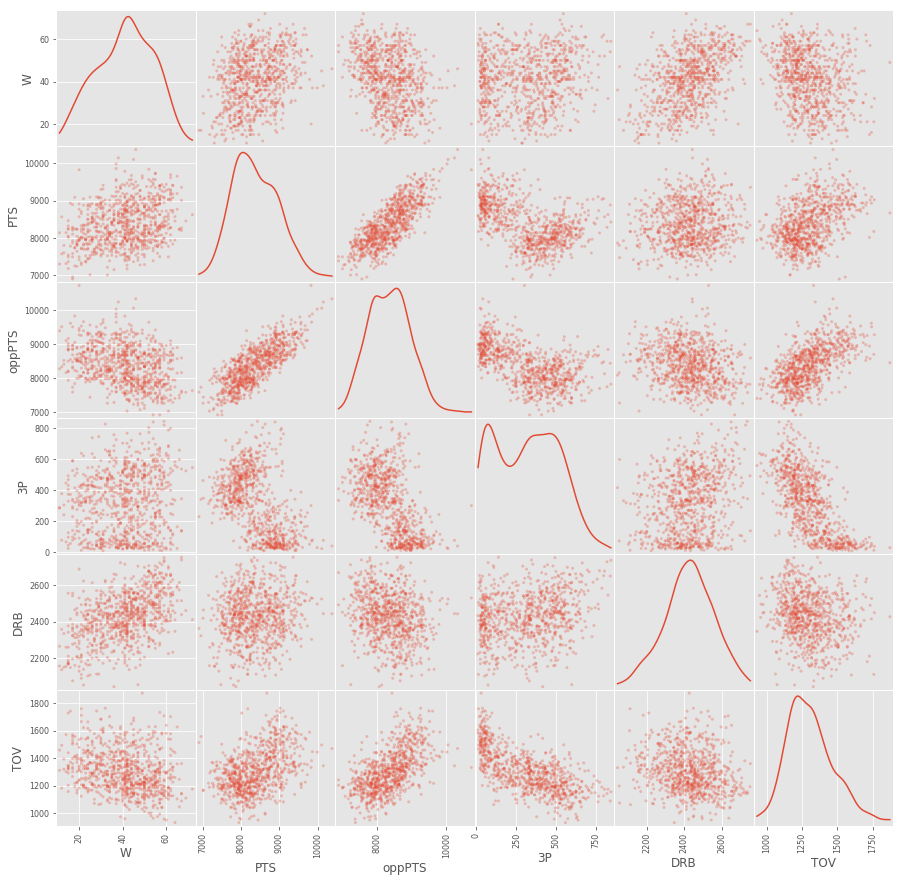

In [182]:
plt.style.use('ggplot')
scatter_matrix(NBA, alpha=.3, figsize=(15,15), diagonal='kde')
plt.show()

In [183]:
y = pd.DataFrame(NBA.iloc[:,0])
X = pd.DataFrame(NBA.iloc[:,1:5])

In [184]:
model = sm.OLS(y, X)

In [185]:
results = model.fit()

In [186]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.471e+04
Date:                Sat, 06 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:32:51   Log-Likelihood:                -2184.6
No. Observations:                 835   AIC:                             4377.
Df Residuals:                     831   BIC:                             4396.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTS            0.0317      0.000     88.308      0.000       0.031       0.032
oppPTS        -0.0299      0.000    -98.467      0.000      -0.031      -0.029
3P             0.0020      0.001      2.949      0.003       0.001       0.003
DRB            0.0105      0.001     14.745      0.000       0.009       0.012
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.680
Skew:                           0.059   Prob(JB):                        0.712
Kurtosis:                       2.924   Cond. No.                         94.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
inflation = pd.DataFrame()
inflation['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
inflation["features"] = X.columns
inflation

,VIF,features
0,688.069872,PTS
1,492.963470,oppPTS
2,5.025873,3P
3,225.133669,DRB


In [193]:
NBA_test_DF = pd.DataFrame(pd.read_csv
                        ('/Users/MattPettit/Downloads/national-basketball-associationnba-dataset/NBA_test.csv'))
NBA_test = NBA_test_DF.drop(columns=(['SeasonEnd', 'Team', 'Playoffs', 'FG', 'FGA', '2P', '2PA', '3PA', 
                                      'FT', 'FTA', 'ORB', 'AST', 'STL', 'BLK']))

In [195]:
y_test = NBA_test.iloc[:,0]
x_test = NBA_test.iloc[:,1:5]

In [200]:
pred = results.predict(x_test)

In [199]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

3.7555662762367072